In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils

In [2]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(50)

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

# Combine output currents
average_outputs("1I_1O/data/", 10, 10)
average_outputs("1I_1O_radius_dis/data/", 10, 10)
average_outputs("1I_1O_high_radius/data/", 10, 10)
average_outputs("1I_1O_R_dis/data/", 10, 10)

# Combine states
average_states("1I_1O/data/", 10 , 10)
average_states("1I_1O_radius_dis/data/", 10 , 10)
average_states("1I_1O_high_radius/data/", 10, 10)
average_states("1I_1O_R_dis/data/", 10 , 10)

In [3]:
results         = pd.DataFrame()
results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
results['U']    = pd.read_csv("1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']

results["I"]    = pd.read_csv("1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["uI"]   = pd.read_csv("1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["r_I"]  = pd.read_csv("1I_1O_radius_dis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["r_uI"] = pd.read_csv("1I_1O_radius_dis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["hr_I"]  = pd.read_csv("1I_1O_high_radius/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["hr_uI"] = pd.read_csv("1I_1O_high_radius/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["R_I"]  = pd.read_csv("1I_1O_R_dis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_uI"] = pd.read_csv("1I_1O_R_dis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results

,t,U,I,uI,r_I,r_uI,hr_I,hr_uI,R_I,R_uI
0,0.1,0.1,900.0,404.722127,1300.0,475.604878,3500.0,857.321410,900.0,404.722127
1,0.2,0.1,1500.0,504.975247,800.0,383.666522,3900.0,846.049644,1500.0,504.975247
2,0.3,0.1,700.0,360.832371,700.0,360.832371,3400.0,727.186359,800.0,383.666522
3,0.4,0.1,700.0,360.832371,800.0,432.666153,3400.0,754.188305,400.0,277.128129
4,0.5,0.1,1600.0,518.459256,400.0,277.128129,4600.0,946.995248,1400.0,490.713766
...,...,...,...,...,...,...,...,...,...,...
994,99.5,0.1,600.0,335.857112,600.0,335.857112,4900.0,948.577883,900.0,404.722127
995,99.6,0.1,1700.0,531.224999,500.0,308.220700,4400.0,1045.370748,700.0,360.832371
996,99.7,0.1,1200.0,459.565012,400.0,277.128129,4700.0,904.544084,1000.0,424.264069
997,99.8,0.1,800.0,383.666522,400.0,277.128129,4500.0,902.773504,1200.0,459.565012


### Input - Output Response

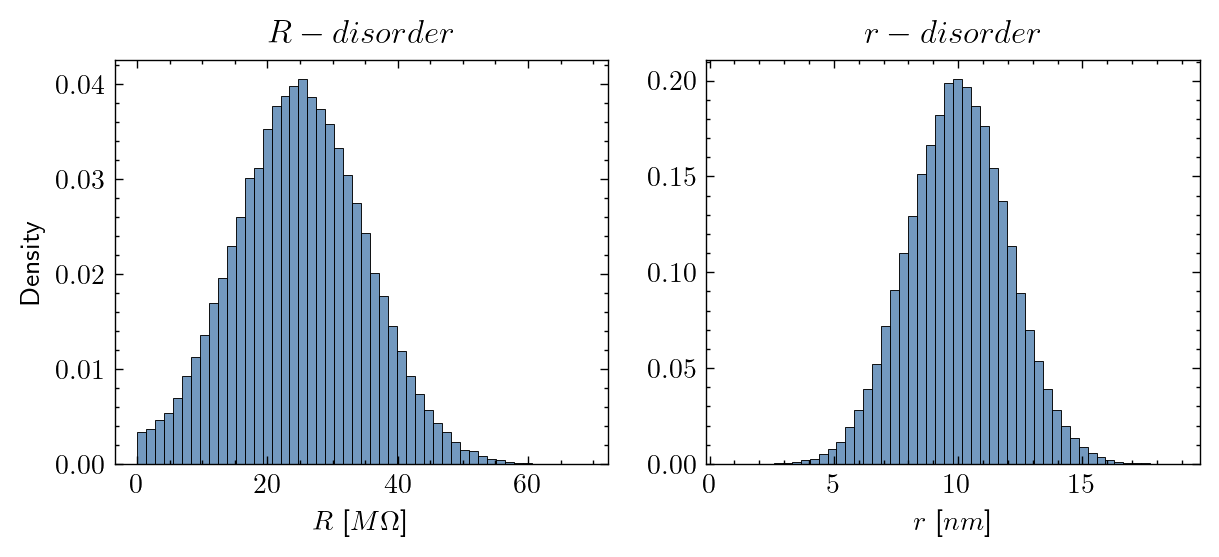

In [159]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)
    ax  = sns.histplot(np.abs(np.random.normal(25,10,100000)), bins=50, stat='density')
    ax.set_xlabel("$R$ [$M\Omega$]")
    ax.set_title('$R-disorder$')

    ax  = fig.add_subplot(1,2,2)
    ax  = sns.histplot(np.abs(np.random.normal(10,2,100000)), bins=50, stat='density')
    ax.set_xlabel("$r$ [$nm$]")
    ax.set_ylabel("")
    ax.set_title('$r-disorder$')

    fig.savefig('plots/r_and_R_hists.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/r_and_R_hists.pdf', bbox_inches='tight', transparent=False)

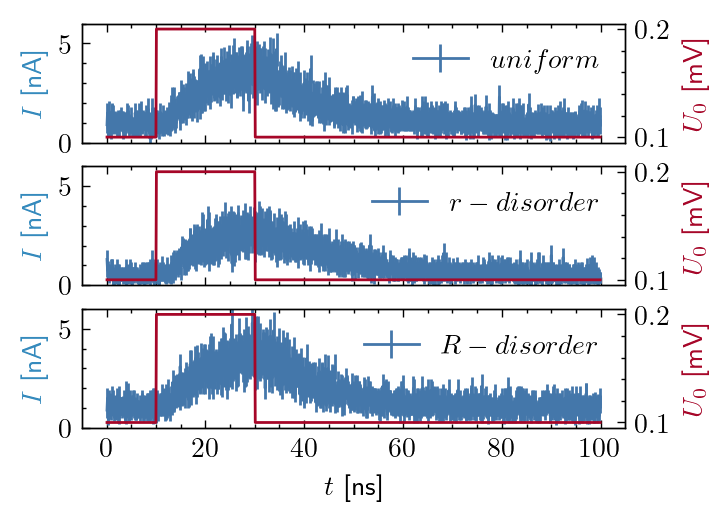

In [158]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    fig.set_figheight(fig.get_figheight())
    
    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='$uniform$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,6)
    ax.legend()

    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_I']/1000, results['r_uI']/1000, label='$r-disorder$')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,6)
    ax.legend()

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_I']/1000, results['R_uI']/1000, label='$R-disorder$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylim(0,6)
    ax.legend()

    fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

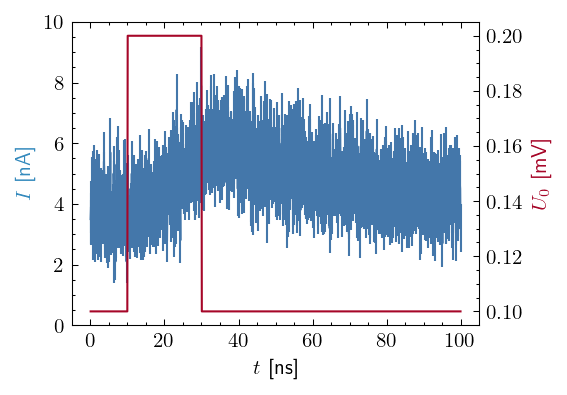

In [48]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    
    ax  = fig.add_subplot()
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(results['t'], results['hr_I']/1000, results['hr_uI']/1000, label='uniform')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,10)

    fig.savefig('plots/i_o_comp_high_radius.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp_high_radius.pdf', bbox_inches='tight', transparent=False)

### Animations

In [50]:
dic = {
    "standard"      : pd.read_csv("1I_1O/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "resistance"    : pd.read_csv("1I_1O_R_dis/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "radius"        : pd.read_csv("1I_1O_radius_dis/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

MovieWriter ffmpeg unavailable; using Pillow instead.


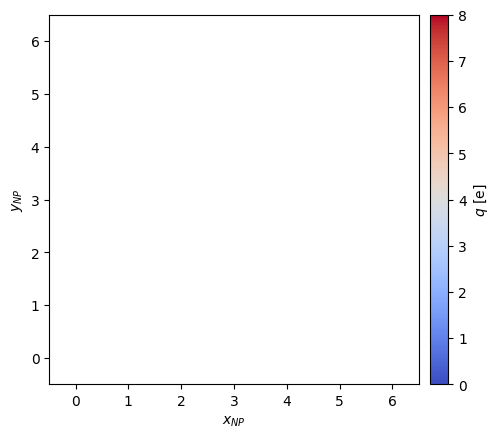

In [55]:
ani = nanonets_utils.animate_landscape(dic["standard"].values, 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                       cbar_label='$q$ [e]', vmin=0, vmax=8)
ani.save("plots/state_animation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


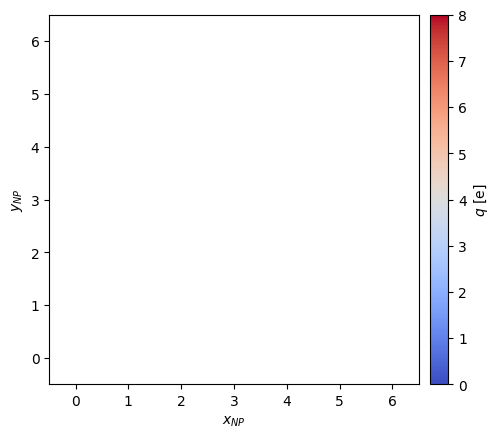

In [60]:
ani = nanonets_utils.animate_landscape(dic["radius"].values, 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                       cbar_label='$q$ [e]', vmin=0, vmax=8)
ani.save("plots/state_animation_radius.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


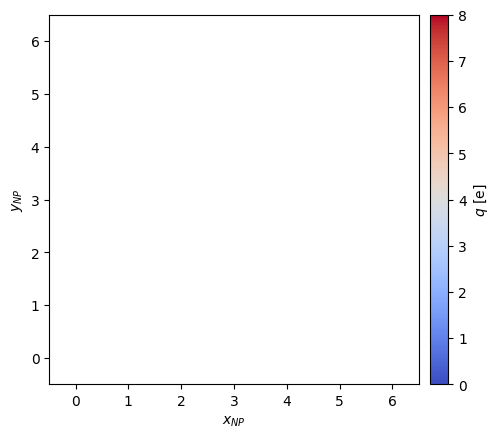

In [61]:
ani = nanonets_utils.animate_landscape(dic["resistance"].values, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=8)
ani.save("plots/state_animation_resistance.gif")

In [74]:
def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

MovieWriter ffmpeg unavailable; using Pillow instead.


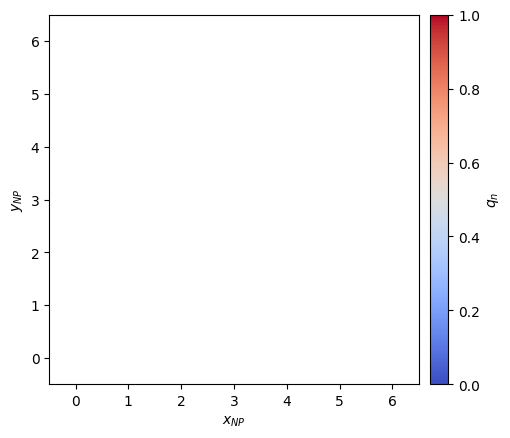

In [160]:
ani = nanonets_utils.animate_landscape(scale_landscape(dic["standard"].values), 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                       cbar_label='$q_n$', vmin=0, vmax=1)
ani.save("plots/state_animation_scaled.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


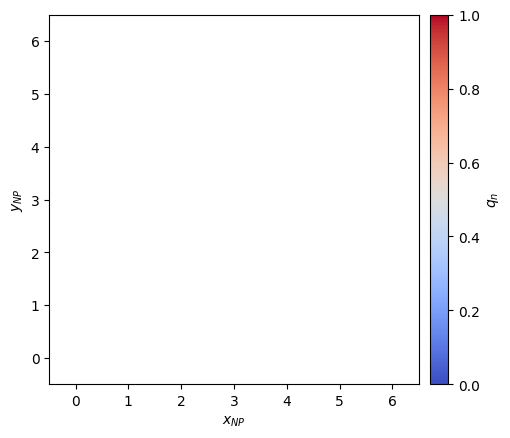

In [161]:
ani = nanonets_utils.animate_landscape(scale_landscape(dic["radius"].values), 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                       cbar_label='$q_n$', vmin=0, vmax=1)
ani.save("plots/state_animation_radius_scaled.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


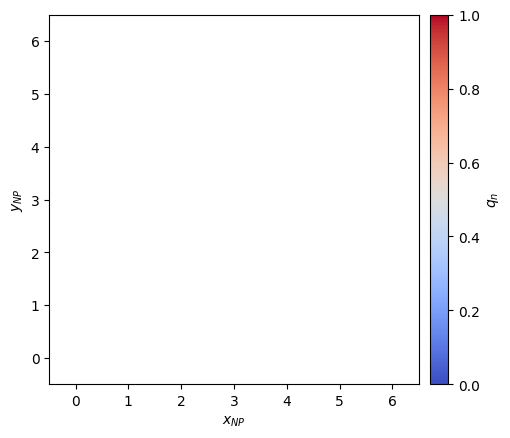

In [162]:
ani = nanonets_utils.animate_landscape(scale_landscape(dic["resistance"].values), 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q_n$',
                                       vmin=0, vmax=1)
ani.save("plots/state_animation_resistance_scaled.gif")

In [93]:
def autocorrelation(x : np.array, y : np.array, lags : int):

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

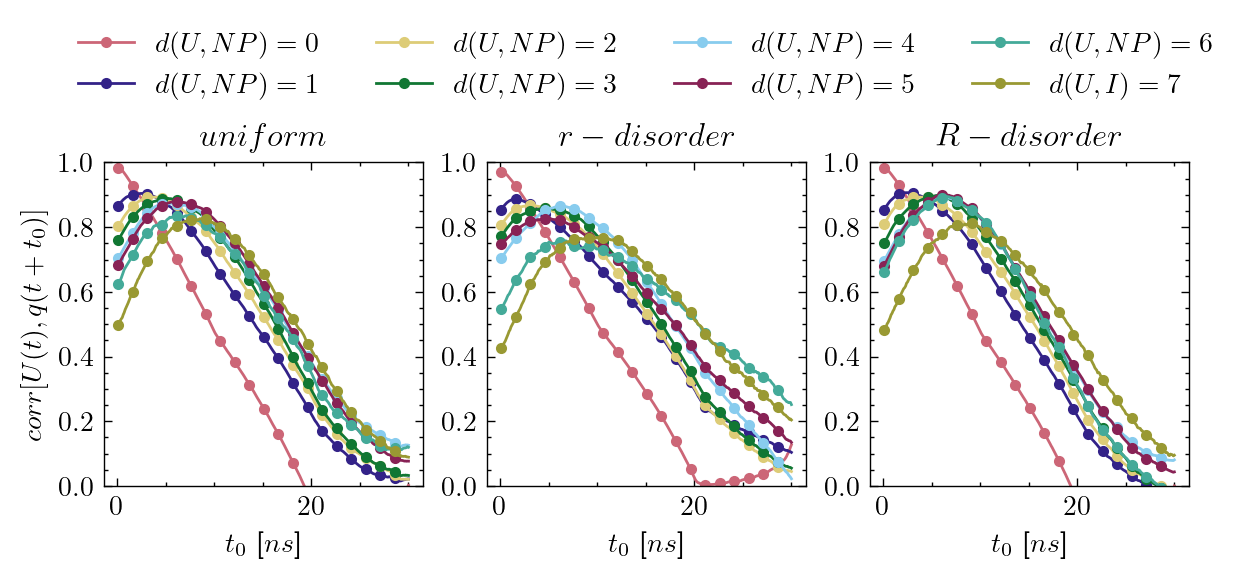

In [157]:
np_index    = [0,8,16,24,32,40,48]
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

with plt.style.context(["science","muted"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*0.8)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    for j, i in enumerate(np_index):

        ax1.plot(t[:n_lags], autocorrelation(x,dic["standard"][f"{i}"].values,n_lags), '.-', markevery=15)
        ax2.plot(t[:n_lags], autocorrelation(x,dic["radius"][f"{i}"].values,n_lags), '.-', markevery=15, label=f"$d(U,NP) = {j}$")
        ax3.plot(t[:n_lags], autocorrelation(x,dic["resistance"][f"{i}"].values,n_lags), '.-', markevery=15)

    ax1.plot(t[:n_lags], autocorrelation(x,results["I"],n_lags), '.-', markevery=15)
    ax2.plot(t[:n_lags], autocorrelation(x,results["r_I"],n_lags), '.-', markevery=15, label=f"$d(U,I) = 7$")
    ax3.plot(t[:n_lags], autocorrelation(x,results["R_I"],n_lags), '.-', markevery=15)

    ax1.set_ylabel("$corr[U(t),q(t+t_0)]$")
    ax1.set_xlabel("$t_0$ [$ns$]")
    ax2.set_xlabel("$t_0$ [$ns$]")
    ax3.set_xlabel("$t_0$ [$ns$]")

    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_ylim(0,1)

    ax1.set_title("$uniform$")
    ax2.set_title("$r-disorder$")
    ax3.set_title("$R-disorder$")

    ax2.legend(ncol=4, bbox_to_anchor=(0.5,1.30), loc='center')

    fig.savefig('plots/state_vs_input_corr.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr.pdf', bbox_inches='tight', transparent=False)